<center><h1>SaRLVision Environment Visualisations</h1>
<h2>Matthias Bartolo</h2>

</center>

**<h3> Package Imports </h3>**

In [1]:
import SaRLVision as srlv
import gymnasium as gym

from SaRLVision.utils import *
from SaRLVision.agents import *

CUDA is available! Using GPU for computations.


**<h3> Defining Classes </h3>**

In [2]:
classes = ['cat', 'bird', 'motorbike', 'diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'dog', 'aeroplane', 'cow', 'sheep', 'sofa']
print(classes)
print('\033[93m' + 'Number of classes: ' + '\033[0m' + str(len(classes)))

['cat', 'bird', 'motorbike', 'diningtable', 'train', 'tvmonitor', 'bus', 'horse', 'car', 'pottedplant', 'person', 'chair', 'boat', 'bottle', 'bicycle', 'dog', 'aeroplane', 'cow', 'sheep', 'sofa']
Number of classes: 20


**<h3> Environment Creation </h3>**

**<h4> Render modes </h4>**
- `human`: Displays the environment with the current bounding box and action being taken by the agent.
- `trigger_image`: Displays the environment with the current bounding box and action being taken by the agent, as well as the `Inhibition of Return (IOR)` trigger mark.
- `bbox`: Displays the environment with the current bounding box and action being taken by the agent, without the image as the background.
- `rgb_array`: Returns the current frame of the environment as a numpy array.
- `None`: No rendering is done.

`Note`: In the environment, training mode, the ground truth bounding boxes and training information is also displayed. To change modes: `env.train()`, `env.eval()` and `env.test()`.

In [3]:
# Defining render modes
render_modes = ['human', 'trigger_image', 'bbox', None]

# Defining the current render mode
current_render_mode = render_modes[0]

# Selecting class
current_class = classes[0]

# Setting the environment configuration
env_config = {'dataset': '../Datasets/PascalVOC2007Dataset',
            'dataset_year': '2007',
            'dataset_image_set': 'test',
            'feature_extractor': VGG16FeatureExtractor(), 
            'target_size': VGG16_TARGET_SIZE,
            'current_class': current_class,
            'use_sara': False,
            'render_mode': current_render_mode,
            'allow_classification': True,
            'threshold': 0.5,
            }

# Creating the environment
env = gym.make('DetectionEnv-v0-View', env_config=env_config)

# Setting name
name = "Normal DQN - Guided Explore - VGG16 - No SaRa"

# Creating the Replay_Buffer
replay_buffer = Replay_Buffer(env)

# Creating the DQN agent
dqn_agent = DQNAgent(env, replay_buffer, name=name, exploration_mode=GUIDED_EXPLORE)

# Loading the model
dqn_agent.load(path="evaluation_models/" + name + '/' + current_class)

# Setting the epsilon to 0
dqn_agent.epsilon = 0.0


Using downloaded and verified file: ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar
Extracting ../Datasets/PascalVOC2007Dataset\VOCtest_06-Nov-2007.tar to ../Datasets/PascalVOC2007Dataset
Dataset loaded successfully.
Total number of classes in the dataset: 20
Total number of images in the dataset: 7632
Current Class: cat


**<h3> Displaying Action Space </h3>**

In [4]:
env.get_actions()

Actions:
0: Move right → 
1: Move left ←
2: Move up ↑
3: Move down ↓
4: Make bigger +
5: Make smaller -
6: Make fatter W
7: Make taller H
8: Trigger T


**<h3> Reinforcement Learning Interaction Loop with Display method </h3>**

**<h4> Display modes </h4>**
- `image`: Displays the environment with the current bounding box and action being taken by the agent.
- `trigger_image`: Displays the environment with the current bounding box and action being taken by the agent, as well as the `Inhibition of Return (IOR)` trigger mark.
- `bbox`: Displays the environment with the current bounding box and action being taken by the agent, without the image as the background.
- `heatmap`: Displays the environment with the current bounding box and action being taken by the agent, in the form of a heatmap (similar to the bbox mode).
- `detection`: Displays the environment with the current bounding box and action being taken by the agent, as well as the class label of the object being detected.
- `None`: No rendering is done.

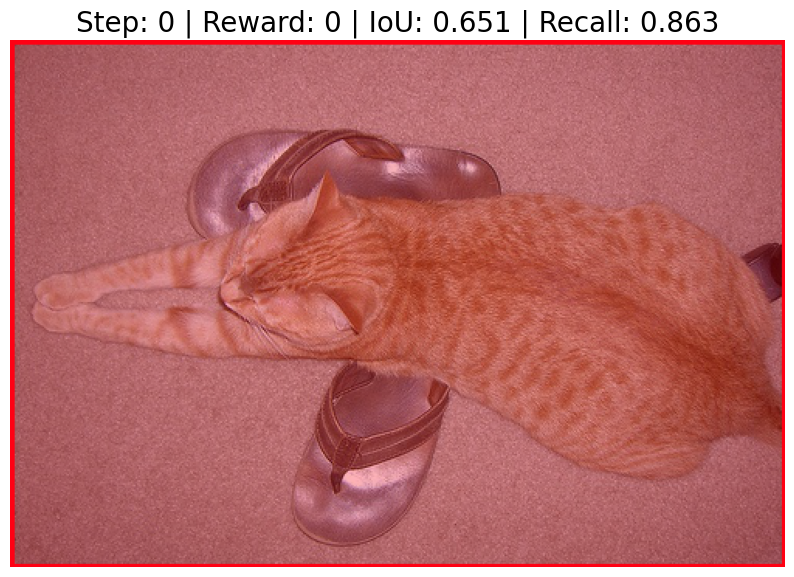

Action: Make smaller -


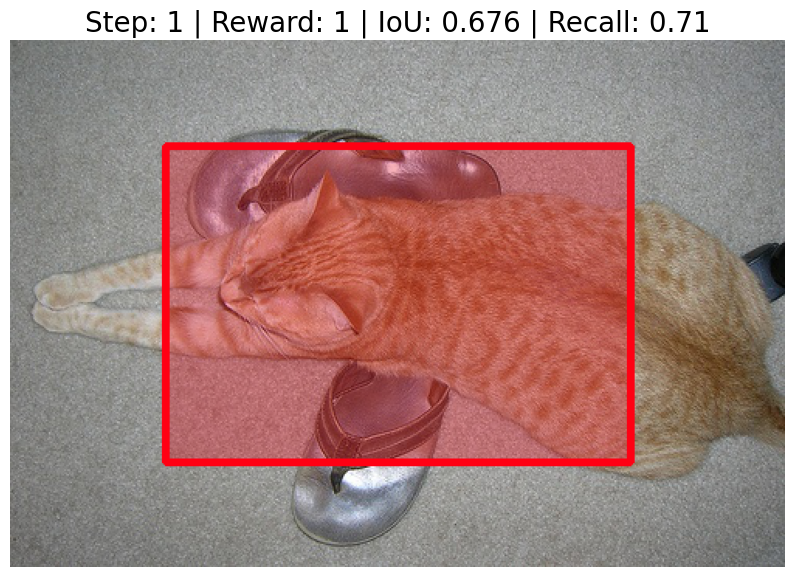

8: Trigger T


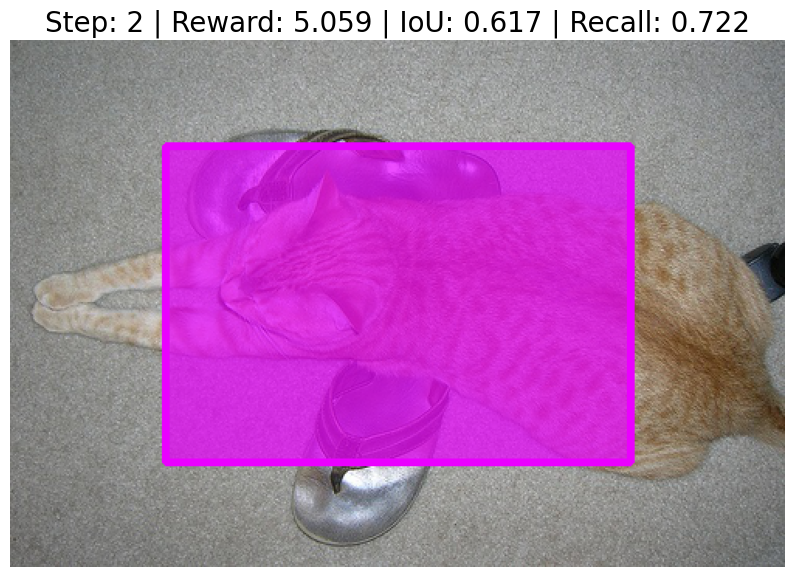

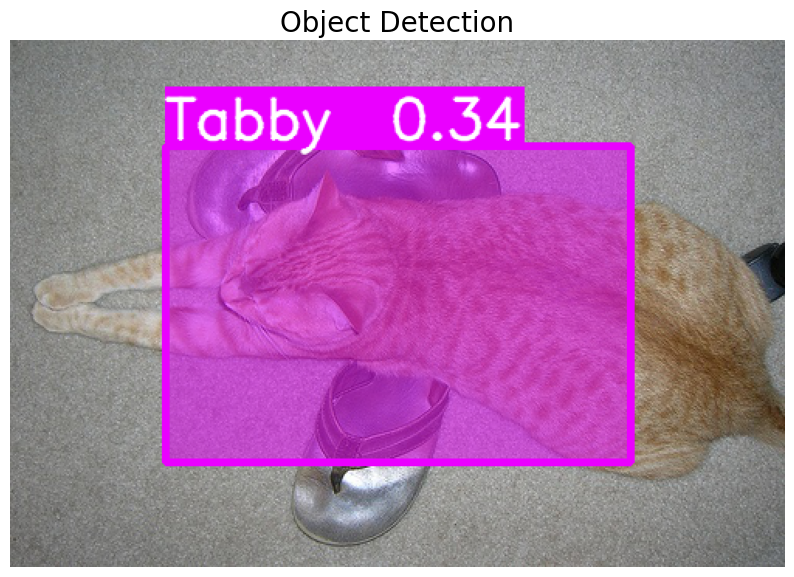

In [5]:
# Defining the display modes
display_modes = ['image', 'trigger_image', 'bbox', 'detection', 'heatmap', None]

# Setting the current display mode
current_display_mode = display_modes[0]

# Possibility to change the classification network
env_config= {'classifier': ResNet50V2(),'classifier_target_size': RESNET50_TARGET_SIZE}
env.reset(env_config=env_config)

# Displaying the environment
env.display(do_display=True, mode=current_display_mode)

# Retrieving the current state
state = env.get_state()

# Declaring terminated and truncated
terminated = truncated = False

# RL Interaction Loop
while True:
    # Selecting the action
    action = dqn_agent.select_action(state)

    # Taking the action
    next_state, _, terminated, truncated, info = env.step(action)

    # Printing the current action
    env.decode_action(action)

    # Setting done
    done = truncated or terminated

    # Updating the state
    state = next_state

    # Displaying the environment
    img = env.display(do_display=True, mode=current_display_mode)
    
    # Checking if done
    if done:
        break

# Predicting class Label
prediction = env.predict(do_display=True, do_save=False, save_path=None)

**<h3> Closing Environment </h3>**

In [6]:
env.close()